![Practicum AI Logo image](https://github.com/PracticumAI/practicumai.github.io/blob/main/images/logo/PracticumAI_logo_250x50.png?raw=true)
***
# *Practicum AI:* GAN - Generator

This exercise was adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 7.02, page 328).

In this exercise, we will build a generator network. The purpose of the generator is to create a fake data distribution from random noise.  We will do this in three steps:

1. Generate random data points as input to the generator.
2. Build a six-layer network.
3. Test the network and plot the output distribution.

To finish this exercise, follow these steps:

#### 1. Import the requisite libraries

In [ ]:
# Importing the library packages

import tensorflow as tf
import numpy as np
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

#### 2. Define input and output features

In [3]:
# Define the input features and output features
infeats = 10
outfeats = 2

We have ten features as input and two features as output. The ten input features are arbitrarily selected. The two output features, on the other hand, are selected because our real dataset contains two features.

#### 3. Generate a batch of random numbers

In [4]:
# Generate a batch of random numbers
batch = 128
genInput = randn(infeats * batch)

For this exercise, we set batch size to 128. Since the input feature size is 10, we will generate 128 * 10 random numbers.

#### 4. Reshape the random data

In [5]:
# Reshape the data 
genInput = genInput.reshape(batch,infeats)
print(genInput.shape)

(128, 10)


#### 5. Define the generator network

In [19]:
# Defining the Generator model
Genmodel = Sequential()

Genmodel.add(Dense(32,activation = 'linear', \
                   kernel_initializer = 'he_uniform', input_dim = infeats))

Genmodel.add(Dense(32,activation = 'relu', \
                   kernel_initializer = 'he_uniform'))

Genmodel.add(Dense(64,activation = 'elu',\
                   kernel_initializer = 'he_uniform'))

Genmodel.add(Dense(32,activation = 'elu',\
                   kernel_initializer = 'he_uniform'))

Genmodel.add(Dense(32,activation = 'selu',\
                   kernel_initializer = 'he_uniform'))

Genmodel.add(Dense(outfeats, activation = 'selu'))


In the first layer, the input dimensions is set to input features `infeats` which was assigned a value in step 2.  And in the last layer, the output dimensions is set to `outfeats` which was assigned a value in step 2.

#### 6. View a summary of the model

In [20]:
# Defining the summary of the network
Genmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 66        
Total params: 6,722
Trainable params: 6,722
Non-trainable params: 0
____________________________________________________

A summary of the model allows us to see the output shapes of each layer. The first hidden layer, for example, has a shape of `(None, 32)`.  So, this layer has 32 neurons.  The `None` in each layer indicates the input batch size.  The number of total trainable parameters in the first layer is 352 and includes both weights and bias.  The weights matrix is 10 x 32 while the number of bias nodes is 1 x 32.  Thus, there are 352 (320 + 32) parameters in total.  This same calculation applies to all subsequent layers.  

#### 7. Generate output from the generator network

In [21]:
# Generating fake samples from network.  The genInput parameter contains the random numbers generated earlier.
fakeSamps = Genmodel.predict(genInput)
fakeSamps.shape

(128, 2)

The output from the generator function generates a sample with two features and 128 instances.

#### 8. Plot the distribution

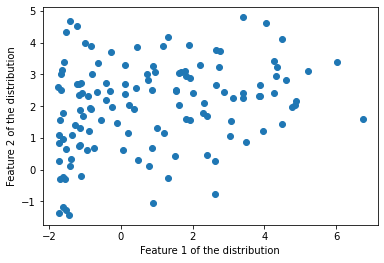

In [22]:
# Plotting the fake distribution
from matplotlib import pyplot

pyplot.scatter(fakeSamps[:,0],fakeSamps[:,1])
pyplot.xlabel('Feature 1 of the distribution')
pyplot.ylabel('Feature 2 of the distribution')
pyplot.show()

When plotted, the random data created by the generator looks pretty good.  Now we need to create a discriminator to evaluate the generator's output.  That's what we'll do in our next exercise.

#### Summary

In this exercise, we created a generator with six layers and then had it create a set of fake samples. But how did we make these network architecture decisions - the number of layers and activation functions?  Interestingly, these choices are usually the byproduct of experimentation, of trial-and-error.